# Задача.
 
* Опишите данную вам выборку, а так же кластеризуйте данные (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

## Предобработаем наши данные для дальнейшей кластеризации

 Импортируем библиотеки, загрузим данные и посмотрим на них

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

import sys
import pandas_profiling
from matplotlib.pyplot import subplots, show
from pandas_profiling import ProfileReport 
from sklearn.decomposition import PCA

import tensorflow as tf
import fancyimpute  
from fancyimpute import IterativeImputer as MICE

Using TensorFlow backend.


In [2]:
df = pd.read_csv('DS.csv', sep='\;', encoding='latin1')
    

In [3]:
df.sample(10)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
32278,27,Ì,500-1000,39,0.0,0,17320.12,0.0,0,505,...,13051.36,17320.12,23525.236667,0.00,0,0.00000,NaN,1209.2782178,0.530165831,2837.07822
18615,19,F,500-1000,28,0.0,0,0,0.0,109.54,70,...,0,0,0,0.00,0,0.00000,NaN,116.27442857,0.4988837873,13.24678759
6203,46,Ì,100-500,97,0.0,697990.43,697990.43,0.0,1028.4,242,...,697990.43,717264.39,673757.03833,697990.43,717264.39,673757.03833,NaN,1838.0814876,0.6180544212,85064.990959
43598,30,Ì,Mega,45,0.0,0,0,0.0,1020.37,106,...,0,0,0,0.00,0,0.00000,NaN,1461.7304717,0.7343444989,648.47418362
2006,64,Ì,500-1000,15,0.0,0,0,4375000.0,0,0,...,0,0,0,0.00,0,0.00000,0.0,NaN,NaN,22353.381224
9738,50,F,100-500,117,0.0,0,0,0.0,660.16,43,...,0,0,0,0.00,0,0.00000,NaN,12315.075581,1.4141525484,56.678482455
14695,41,F,500-1000,77,0.0,0,0,0.0,159.4,242,...,0,0,0,0.00,0,0.00000,NaN,1311.7502066,0.042841944,2453.3140778
41982,34,Ì,500-1000,131,0.0,0,0,0.0,5996.08,0,...,0,0,0,0.00,0,0.00000,NaN,NaN,NaN,2337.4817766
42417,30,F,100-500,79,0.0,4954.85,4954.85,0.0,1949.91,0,...,4954.85,8164.73,12742.69,4954.85,8164.73,12742.69000,NaN,NaN,NaN,1537.2190042
47005,63,Ì,500-1000,61,0.0,0,0,0.0,107876.03,18,...,0,0,0,0.00,0,0.00000,NaN,3921.2283333,0.0406434356,8841.8560606


Посмотрим описание столбцов

In [4]:
info = pd.read_excel('info.xlsx', encoding='latin1')

In [5]:
print(info)

                   Name                             Unnamed: 1
0                   age                                возраст
1                gender                        пол repexc_date
2             city_type          Тип города проживания клиента
3              full_mob  Длительность взаимоотношений с банком
4            ml_balance                                ипотека
5         cl_balance_0m                 потребительский кредит
6       loan_balance_0m                            все кредиты
7         td_balance_0m                                депозит
8       casa_balance_0m                                  счета
9            dc_trx_cnt              количество трат по картам
10           dc_trx_sum                   сумма трат по картам
11               income                          доход клиента
12  min_casa_balance_1q        показатели по счетам за квартал
13  max_casa_balance_1q                                    NaN
14  avg_casa_balance_1Y            показатели по счетам

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
age                    50000 non-null int64
gender                 49277 non-null object
city_type              50000 non-null object
full_mob               50000 non-null int64
ml_balance             50000 non-null float64
cl_balance_0m          50000 non-null object
loan_balance_0m        50000 non-null object
td_balance_0m          50000 non-null float64
casa_balance_0m        50000 non-null object
dc_trx_cnt             50000 non-null int64
dc_trx_sum             50000 non-null object
income                 50000 non-null float64
min_casa_balance_1q    50000 non-null object
max_casa_balance_1q    50000 non-null object
avg_casa_balance_1Y    50000 non-null object
min_td_balance_1q      50000 non-null float64
max_td_balance_1q      50000 non-null float64
avg_td_balance_1Y      50000 non-null float64
min_loan_balance_1q    50000 non-null object
max_loan_balance_1q    50000 non-

In [7]:
df.describe()

,age,full_mob,ml_balance,td_balance_0m,dc_trx_cnt,income,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,3820.000000
mean,41.524480,53.642820,1.288144e+04,7.002303e+04,105.011400,2.600832e+04,6.031244e+04,7.623054e+04,7.112344e+04,5.556172e+04,5.534414e+04,18.236559
std,12.866034,47.430416,1.874505e+05,1.679410e+06,192.687683,4.359979e+05,9.714101e+05,1.762953e+06,1.115035e+06,1.896891e+05,1.725155e+05,269.329001
min,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,32.000000,13.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,40.000000,37.000000,0.000000e+00,0.000000e+00,14.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,51.000000,81.000000,0.000000e+00,0.000000e+00,122.000000,3.162002e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,98.000000,236.000000,1.467568e+07,3.305000e+08,2970.000000,9.060000e+07,1.332600e+08,3.473500e+08,1.616579e+08,5.646888e+06,4.112823e+06,12521.279170


Посмотрим детальнее на наши данные и какие они содержат проблемы.

In [8]:
pandas_profiling.ProfileReport(df)

Number of variables,28
Number of observations,50000
Total Missing (%),6.1%
Total size in memory,10.7 MiB
Average record size in memory,224.0 B
Numeric,9
Categorical,16
Boolean,0
Date,0
Text (Unique),0
Rejected,3


## Предварительные проблемы, которые обнаружились
Предварительный анализ показал, что по всему датасету пропущено 6% данных, наибольшее влияние на это оказывает столбец loan_to_deposit , где пропущено более 90% данных. Также, много столбцов, где количество нулевых значений больше 80% (ml_balance, cl_balance_0m, td_balance_0m, avg_td_balance_1Y). Также найдено 26 дубликатов. Столбец age вызывает вопрос минимальным возрастом в 4 года, скорее всего это (и весь остальной возраст до 18 лет) ошибка данных, т.к.клиентом банка могут быть только соевершеннолетние.Неправильный формат некоторых данных, нужно преобразование. Неудобные названия и неоднородный шрифт. Продолжим предобработку данных.
Часть операций будут дублировать полученную информацию для удобства, на случай, если у вас нет установленного модуля pandas_profiling.

посчитаем  дубликаты и пропуски

In [9]:
df.duplicated().sum()

26

In [10]:
#удалим дубли, сборсим индексы и проверим успешность удаления
df = df.drop_duplicates().reset_index(drop = True)
df.duplicated().sum()

0

Переименуем часть столбцов в более удобные

In [11]:

df.rename({'ml_balance': 'mortgage', 'full_mob':'duration', 'cl_balance_0m': 'consumer_credit', 'loan_balance_0m': 'all_credits',
                    'casa_balance_0m': 'accounts','td_balance_0m': 'deposit', 'dc_trx_cnt': 'costs_count', 
                    'dc_trx_sum': 'costs_sum', 'Avg_trx': 'average_trx', 'nbi': 'inc_no_opex'}, axis ='columns', inplace = True)



In [12]:
df['city_type'].value_counts()

<100        15406
100-500     10725
Mega         8951
1M+          7905
500-1000     6987
Name: city_type, dtype: int64

In [13]:
df['city_type']= df['city_type'].map({
     '100-500':'small', '500-1000':'big', 'Mega': 'megapolis', '1M+':'large','<100':'tiny'
})

In [14]:
df['city_type'].value_counts()

tiny         15406
small        10725
megapolis     8951
large         7905
big           6987
Name: city_type, dtype: int64

Посмотрим какой процент от датасета составляют массовые пропуски

In [15]:

gender_counts = df[df['gender'].isnull()].shape[0]
print("NaN: {}\tПроцент пустых значений в gender: {:.1%}"
      .format(gender_counts, gender_counts/df.shape[0]))

NaN: 723	Процент пустых значений в gender: 1.4%


In [16]:
loan_to_deposit_counts = df[df['loan_to_deposit'].isnull()].shape[0]
print("NaN: {}\tПроцент пустых значений в loan_to_deposit: {:.1%}"
      .format(loan_to_deposit_counts, loan_to_deposit_counts/df.shape[0]))

NaN: 46154	Процент пустых значений в loan_to_deposit: 92.4%


In [17]:

nbi_counts = df[df['inc_no_opex'].isnull()].shape[0]
print("NaN: {}\tПроцент пустых значений в inc_no_opex: {:.1%}"
      .format(nbi_counts, nbi_counts/df.shape[0]))

NaN: 2406	Процент пустых значений в inc_no_opex: 4.8%


Много пропущенных значений. Т.к. параметр loan_to_deposit отсутствует практически полностью, то удалим loan_to_deposit целиком

In [18]:
df.drop('loan_to_deposit', axis = 1, inplace = True)


In [19]:
df.dropna(inplace=True)

Поменяем тип данных некоторых столбцов на более удобные и правильные для работы

In [20]:
df["inc_no_opex"] = pd.to_numeric(df['inc_no_opex'], errors='coerce')

In [21]:
df["consumer_credit"] = pd.to_numeric(df['consumer_credit'], errors='coerce')

In [22]:
df["all_credits"] = pd.to_numeric(df['all_credits'], errors='coerce')

In [23]:
df["accounts"] = pd.to_numeric(df['accounts'], errors='coerce')

In [24]:
df["costs_sum"] = pd.to_numeric(df['costs_sum'], errors='coerce')

In [25]:
df["min_casa_balance_1q"] = pd.to_numeric(df['min_casa_balance_1q'], errors='coerce')

In [26]:
df["max_casa_balance_1q"] = pd.to_numeric(df['max_casa_balance_1q'], errors='coerce')

In [27]:
df["max_cl_balance_1q"] = pd.to_numeric(df['max_cl_balance_1q'], errors='coerce')

In [28]:
df["avg_td_balance_1Y"] = pd.to_numeric(df['avg_td_balance_1Y'], errors='coerce')

In [29]:
df["avg_casa_balance_1Y"] = pd.to_numeric(df['avg_casa_balance_1Y'], errors='coerce')

In [30]:
df["average_trx"] = pd.to_numeric(df['average_trx'], errors='coerce')

In [31]:
df["min_loan_balance_1q"] = pd.to_numeric(df['min_loan_balance_1q'], errors='coerce')

In [32]:
df["max_loan_balance_1q"] = pd.to_numeric(df['max_loan_balance_1q'], errors='coerce')

In [33]:
df["avg_loan_balance_1Y"] = pd.to_numeric(df['avg_loan_balance_1Y'], errors='coerce')

In [34]:
df["avgtrx_to_balance"] = pd.to_numeric(df['avgtrx_to_balance'], errors='coerce')

In [35]:
df.dropna(inplace=True)

In [36]:
df["income"] = df.income.astype(int)
df["mortgage"] = df.mortgage.astype(int)
df["consumer_credit"] = df.consumer_credit.astype(int)
df["all_credits"] = df.all_credits.astype(int)

In [37]:
df["average_trx"] = df.average_trx.astype(int)
df["avgtrx_to_balance"] = df.avgtrx_to_balance.astype(int)
df["inc_no_opex"] = df.inc_no_opex.astype(int)
df["accounts"] = df.accounts.astype(int)
df["costs_sum"] = df.costs_sum.astype(int)


In [38]:
df["deposit"] = df.deposit.astype(int)

In [39]:
df.dtypes

age                      int64
gender                  object
city_type               object
duration                 int64
mortgage                 int64
consumer_credit          int64
all_credits              int64
deposit                  int64
accounts                 int64
costs_count              int64
costs_sum                int64
income                   int64
min_casa_balance_1q    float64
max_casa_balance_1q    float64
avg_casa_balance_1Y    float64
min_td_balance_1q      float64
max_td_balance_1q      float64
avg_td_balance_1Y      float64
min_loan_balance_1q    float64
max_loan_balance_1q    float64
avg_loan_balance_1Y    float64
min_cl_balance_1q      float64
max_cl_balance_1q      float64
avg_cl_balance_1Y      float64
average_trx              int64
avgtrx_to_balance        int64
inc_no_opex              int64
dtype: object

In [40]:
df.isnull().sum()

age                    0
gender                 0
city_type              0
duration               0
mortgage               0
consumer_credit        0
all_credits            0
deposit                0
accounts               0
costs_count            0
costs_sum              0
income                 0
min_casa_balance_1q    0
max_casa_balance_1q    0
avg_casa_balance_1Y    0
min_td_balance_1q      0
max_td_balance_1q      0
avg_td_balance_1Y      0
min_loan_balance_1q    0
max_loan_balance_1q    0
avg_loan_balance_1Y    0
min_cl_balance_1q      0
max_cl_balance_1q      0
avg_cl_balance_1Y      0
average_trx            0
avgtrx_to_balance      0
inc_no_opex            0
dtype: int64

Все преобразования прошли успешно.

очень большое количество столбцов содержит в основном нули. Проверим и решим, что с этим делать.

In [41]:
#Посмотрим какой процент нулевого кредита, депозита и тд
mortgage_zero = df[df['mortgage'] == 0].shape[0]
print("mortgage: {}\tПроцент 0 mortgage: {:.1%}"
      .format(mortgage_zero, mortgage_zero/df.shape[0]))

mortgage: 26184	Процент 0 mortgage: 99.2%


In [42]:
deposit_zero = df[df['deposit'] == 0].shape[0]
print("deposit: {}\tПроцент 0 deposit: {:.1%}"
      .format(deposit_zero, deposit_zero/df.shape[0]))

deposit: 25314	Процент 0 deposit: 95.9%


In [43]:
avg_td_balance_1Y_zero = df[df['avg_td_balance_1Y'] == 0].shape[0]
print("avg_td_balance_1Y: {}\tПроцент 0 income: {:.1%}"
      .format(avg_td_balance_1Y_zero, avg_td_balance_1Y_zero/df.shape[0]))

avg_td_balance_1Y: 24791	Процент 0 income: 94.0%


In [44]:
min_td_balance_1q_zero = df[df['min_td_balance_1q'] == 0].shape[0]
print("min_td_balance_1q: {}\tПроцент 0 min_td_balance_1q: {:.1%}"
      .format(min_td_balance_1q_zero, min_td_balance_1q_zero/df.shape[0]))

min_td_balance_1q: 25396	Процент 0 min_td_balance_1q: 96.2%


Нулевых значений больше 90 процентов, что серьезно влияет на анализ. Я считаю, что mortgage, deposit, min_td_balance_1q и avg_td_balance_1Y можно удалить.

In [45]:
df.drop('mortgage', axis = 1, inplace = True)

In [46]:
df.drop('deposit', axis = 1, inplace = True)

In [47]:
df.drop('avg_td_balance_1Y', axis = 1, inplace = True)

In [48]:
df.drop('min_td_balance_1q', axis = 1, inplace = True)

In [49]:
df.head()

,age,gender,city_type,duration,consumer_credit,all_credits,accounts,costs_count,costs_sum,income,...,max_td_balance_1q,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,average_trx,avgtrx_to_balance,inc_no_opex
9,36,Ì,tiny,154,0,32413,0,83,324947,22100,...,0.0,32413.52,34119.49,38051.374167,0.0,0.0,0.0,3915,4,6065
10,56,F,tiny,165,0,61189,1524,341,451481,36694,...,70000.0,44360.86,61189.99,43218.413333,0.0,0.0,0.0,1323,0,8009
12,20,F,large,3,0,0,10338,105,126229,44169,...,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,1202,0,157
13,51,Ì,small,37,0,0,8738,189,783517,62108,...,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,4145,0,3054
14,50,F,small,156,0,521337,50,16,243600,385000,...,0.0,521337.41,530412.52,374931.774170,0.0,0.0,0.0,15225,40,57309


Посмотрим обновленную информацию по датасету после предобработки

In [50]:
pandas_profiling.ProfileReport(df)

Number of variables,24
Number of observations,26387
Total Missing (%),0.0%
Total size in memory,4.8 MiB
Average record size in memory,192.0 B
Numeric,13
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,9


## Кластеризация данных

Определим оптимальное количество кластеров и применим разные типы кластеризации к нашему датасету и посмотрим на результат

Для начала, уберем категориальные переменных из общего датасета в отдельный, а пол заменим для удобства, на 0 и 1

In [51]:
df.replace('F',1, inplace = True)

In [52]:
df.replace('Ì',0, inplace = True)

In [53]:
df['gender'].unique()

array([0, 1])

In [54]:
df['gender'] = df['gender'].astype(object)

In [55]:
a = df[['city_type']]

In [56]:
df.drop('city_type',  axis = 1, inplace = True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26387 entries, 9 to 49973
Data columns (total 22 columns):
age                    26387 non-null int64
gender                 26387 non-null object
duration               26387 non-null int64
consumer_credit        26387 non-null int64
all_credits            26387 non-null int64
accounts               26387 non-null int64
costs_count            26387 non-null int64
costs_sum              26387 non-null int64
income                 26387 non-null int64
min_casa_balance_1q    26387 non-null float64
max_casa_balance_1q    26387 non-null float64
avg_casa_balance_1Y    26387 non-null float64
max_td_balance_1q      26387 non-null float64
min_loan_balance_1q    26387 non-null float64
max_loan_balance_1q    26387 non-null float64
avg_loan_balance_1Y    26387 non-null float64
min_cl_balance_1q      26387 non-null float64
max_cl_balance_1q      26387 non-null float64
avg_cl_balance_1Y      26387 non-null float64
average_trx            26387 non-n

Посмотрим взаимосвязи

In [58]:
%matplotlib inline

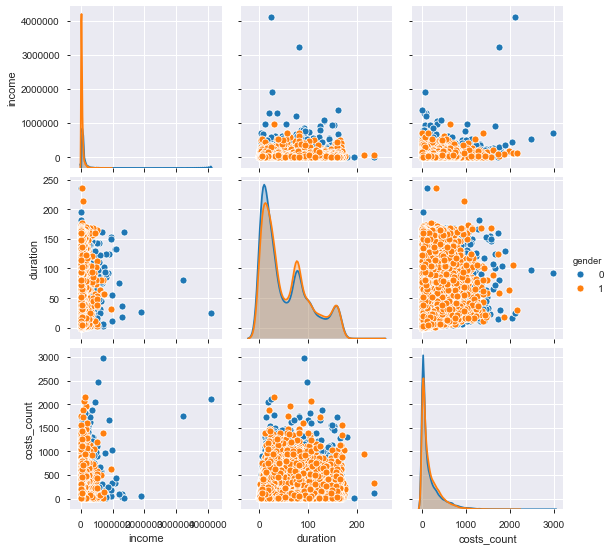

In [59]:
sns.pairplot(df,hue='gender',vars=['income','duration','costs_count'])
plt.show()

In [60]:
selected_cols = ["age","duration", "costs_count"]
cluster_data = df.loc[:,selected_cols]

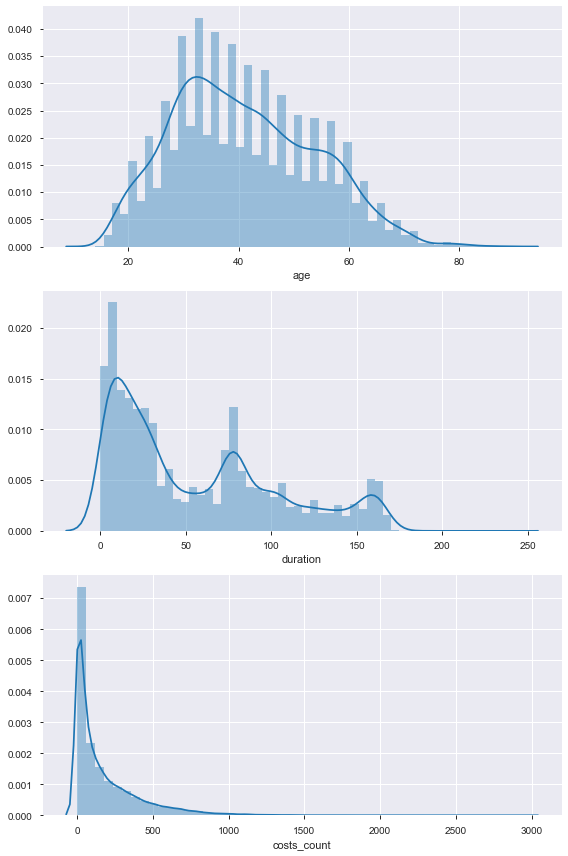

In [61]:
#посмотрим распределение
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,12))
    sns.distplot(df["age"], ax=ax1)
    sns.distplot(df["duration"], ax=ax2)
    sns.distplot(df["costs_count"], ax=ax3)
    plt.tight_layout()
distributions(cluster_data)

In [62]:
X = np.array(df[['costs_count', 'age']])
y = np.array(df['gender'])

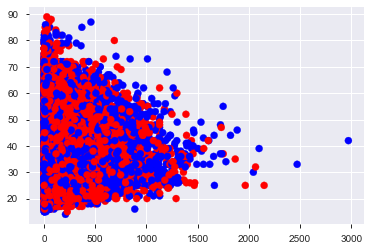

In [63]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'bwr',  s = 50)
plt.show()

Посмотрим кластеризацию всего датасета

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)

In [66]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26387 entries, 0 to 26386
Data columns (total 22 columns):
age                    26387 non-null float64
gender                 26387 non-null float64
duration               26387 non-null float64
consumer_credit        26387 non-null float64
all_credits            26387 non-null float64
accounts               26387 non-null float64
costs_count            26387 non-null float64
costs_sum              26387 non-null float64
income                 26387 non-null float64
min_casa_balance_1q    26387 non-null float64
max_casa_balance_1q    26387 non-null float64
avg_casa_balance_1Y    26387 non-null float64
max_td_balance_1q      26387 non-null float64
min_loan_balance_1q    26387 non-null float64
max_loan_balance_1q    26387 non-null float64
avg_loan_balance_1Y    26387 non-null float64
min_cl_balance_1q      26387 non-null float64
max_cl_balance_1q      26387 non-null float64
avg_cl_balance_1Y      26387 non-null float64
average_trx      

In [67]:
df_scaled.head()

,age,gender,duration,consumer_credit,all_credits,accounts,costs_count,costs_sum,income,min_casa_balance_1q,...,max_td_balance_1q,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,average_trx,avgtrx_to_balance,inc_no_opex
0,-0.380282,-1.015776,2.031995,-0.318852,-0.192738,-0.046398,-0.409866,-0.060168,-0.175804,-0.038178,...,-0.034207,-0.173781,-0.202978,-0.159274,-0.309137,-0.32723,-0.33337,-0.080343,-0.017305,-0.127523
1,1.187168,0.984469,2.259709,-0.318852,-0.092089,-0.045722,0.720525,0.110214,0.046886,-0.037506,...,-0.004751,-0.130113,-0.112674,-0.139710,-0.309137,-0.32723,-0.33337,-0.235968,-0.017837,-0.092613
2,-1.634242,0.984469,-1.093889,-0.318852,-0.306109,-0.041814,-0.313476,-0.327747,0.160947,-0.036030,...,-0.034207,-0.292251,-0.316797,-0.303345,-0.309137,-0.32723,-0.33337,-0.243233,-0.017837,-0.233617
3,0.795305,-1.015776,-0.390048,-0.318852,-0.306109,-0.042524,0.054558,0.557310,0.434678,-0.034184,...,-0.034207,-0.292251,-0.316797,-0.303345,-0.309137,-0.32723,-0.33337,-0.066533,-0.017837,-0.181594
4,0.716933,0.984469,2.073398,-0.318852,1.517370,-0.046375,-0.703417,-0.169704,5.361680,-0.038178,...,-0.034207,1.613217,1.452600,1.116232,-0.309137,-0.32723,-0.33337,0.598717,-0.012516,0.792705


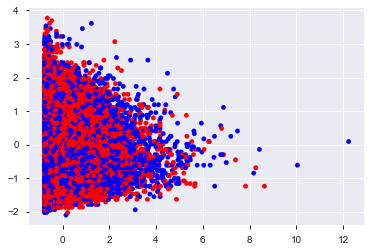

In [68]:

plt.scatter(df_scaled['costs_count'], df_scaled['age'], c=df_scaled['gender'], cmap='bwr', s=20)

Кластеризуем наши данные с помощью алгоритма К-средних и выясним оптимальное число кластеров

In [69]:
from sklearn.cluster import KMeans

In [70]:
alg = KMeans(n_clusters = 8)

In [71]:
clusters = alg.fit_predict(df_scaled)

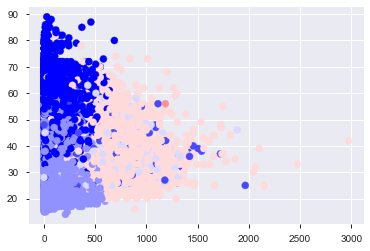

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=50)

Разделим наши данные на мужчин(0) и женщин (1)

In [73]:
X = np.array(df[['costs_count', 'age']][df['gender'] == 1])

In [74]:
X_scaled = scaler.fit_transform(X)

In [75]:
clusters = alg.fit_predict(X_scaled)

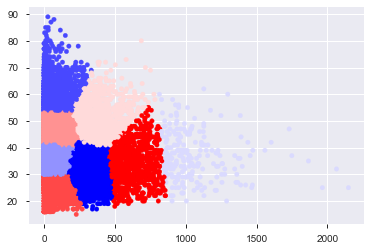

In [76]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

мы получили распределение по age и costs_count по женщинам и теперь посмотрим по мужчинам

In [77]:
X = np.array(df[['costs_count', 'age']][df['gender'] == 0])

In [78]:
X_scaled = scaler.fit_transform(X)

In [79]:
clusters = alg.fit_predict(X_scaled)

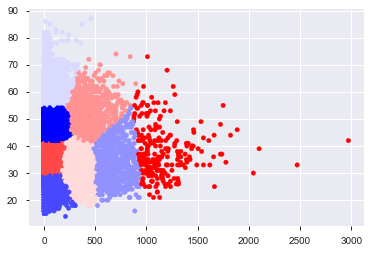

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

Разница есть, но не очень существенная

Подберем оптимальное количество кластеров

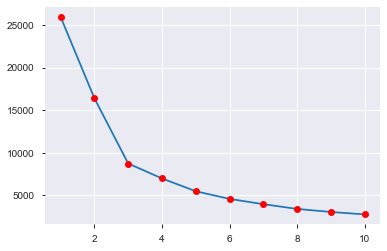

In [81]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

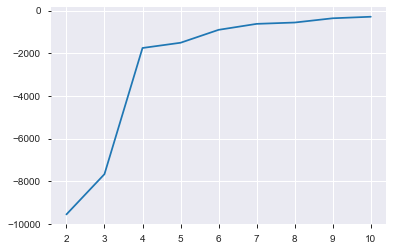

In [82]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

In [83]:
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
print('Оптимально число кластеров:', k_opt)

Оптимально число кластеров: 3


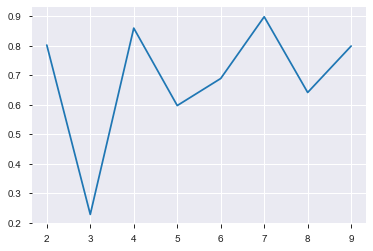

In [84]:
plt.plot(ks[1:-1],diff_r)

Посмотрим с правильным числом кластеров

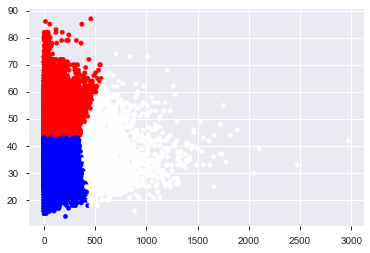

In [85]:
alg = KMeans(n_clusters=3)
clusters = alg.fit_predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

Мы видим, что невысокие показатели costs_count связаны с возрастом клиентов, когда как высокие показатели costs_count имеют более широкий возрастной диапазон. Также, мы увидели, что гендерной разницы в наших данных практически нет.

Теперь посмотрим другими методами. Для начала возьмем тот же метод К средних, но с помощью elbow метода определим оптимальное количество кластеров

KMeans + Elbow Method

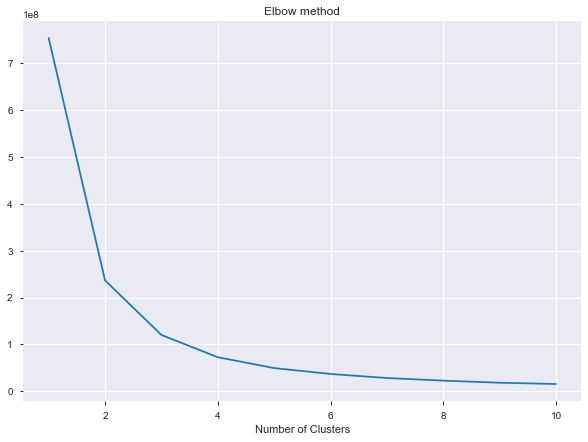

In [86]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init = 'k-means++', n_init=10, max_iter=300, random_state=101).fit(X)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.show()

этот метод показывает оптимальным тоже 3 кластера

In [87]:
kmean = KMeans(n_clusters=3,init = 'k-means++', n_init=10, max_iter=300, random_state=101)
y_kmean = kmean.fit_predict(X)


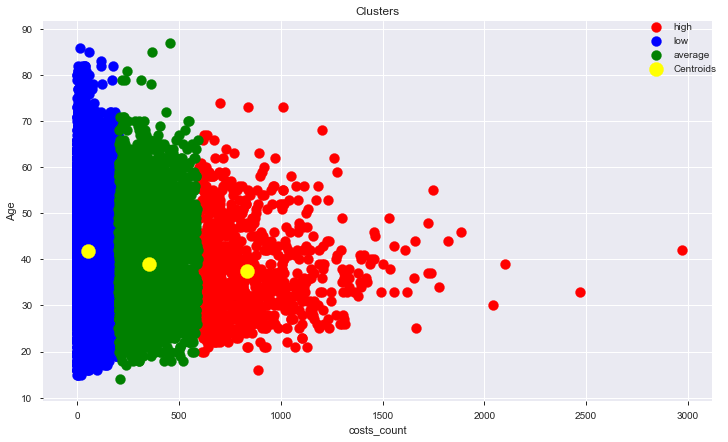

In [88]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_kmean==0, 0], X[y_kmean==0, 1], s=100, c = 'red', label ='high')
plt.scatter(X[y_kmean==1, 0], X[y_kmean==1, 1], s=100, c = 'blue', label ='low')
plt.scatter(X[y_kmean==2, 0], X[y_kmean==2, 1], s=100, c = 'green', label ='average')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=200, c = 'yellow', label ='Centroids')
plt.title('Clusters')
plt.xlabel('costs_count')
plt.ylabel('Age')
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.show()

Агломерационная кластеризация

In [89]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity ='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

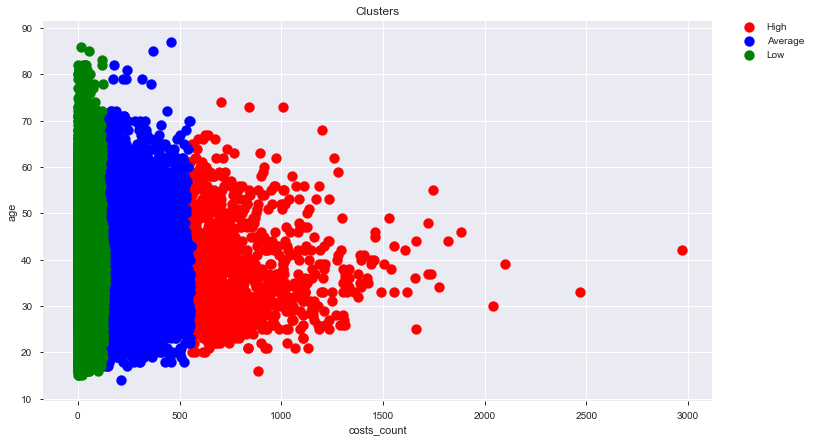

In [90]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c = 'red', label ='High')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c = 'blue', label ='Average')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c = 'green', label ='Low')
plt.title('Clusters')
plt.xlabel('costs_count')
plt.ylabel('age')
plt.legend(bbox_to_anchor=(1.15, 1.02))
plt.show()


Мы кластеризовали данные, получив разными методами оптимальное количество кластеров равное 3. Благодаря нашему анализу мы наглядно можем проследить взаимосвязь возраста, пола и количества трат по картам.Так мы видим, что самые небольшие показатели количества трат по картам имеют самый большой размах и затрагивает практически все возрастные группы от 15 до 85 лет. Основной средних уровень количества трат отличается только максимальным возрастом, что возможно связано с общим уровнем дохода людей старшего возраста, а вот с большим количеством трат, возрастной размах сужается и чем больше траты, тем больше наши данные концентрируются в районе 40 лет, что делает этот возраст самым привлекательным для банка, если ориентироваться на количество трат.

Посмотрим еще на примере других показателей

In [91]:
X = np.array(df[['average_trx', 'inc_no_opex']])
y = np.array(df['gender'])

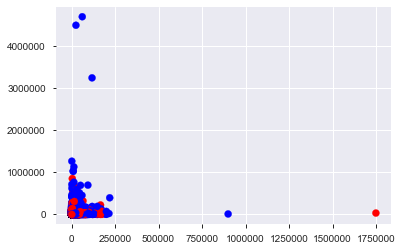

In [92]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'bwr',  s = 50)
plt.show()

In [93]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)

Разделим наши данные на мужчин(0) и женщин (1)

In [94]:
X = np.array(df[['average_trx', 'inc_no_opex']][df['gender'] == 1])

In [95]:
X_scaled = scaler.fit_transform(X)

In [96]:
clusters = alg.fit_predict(X_scaled)

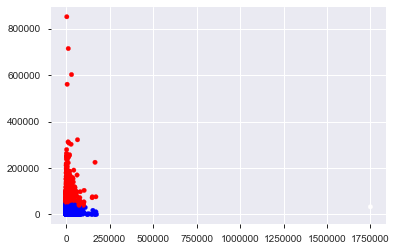

In [97]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

мы получили распределение по 'average_trx' и 'inc_no_opex' по женщинам и теперь посмотрим по мужчинам

In [98]:
X = np.array(df[['average_trx', 'inc_no_opex']][df['gender'] == 0])

In [99]:
X_scaled = scaler.fit_transform(X)

In [100]:
clusters = alg.fit_predict(X_scaled)

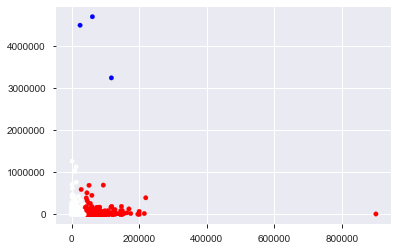

In [101]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

Видна явная разница между мужчинами и женщинами и их продуктовым поведением. Отличается и размер средней тразакции и доходность.  Такое отличие позволит разработать более таргетированный подход в предложении банковских продуктов по полам.

KMeans + Elbow Method

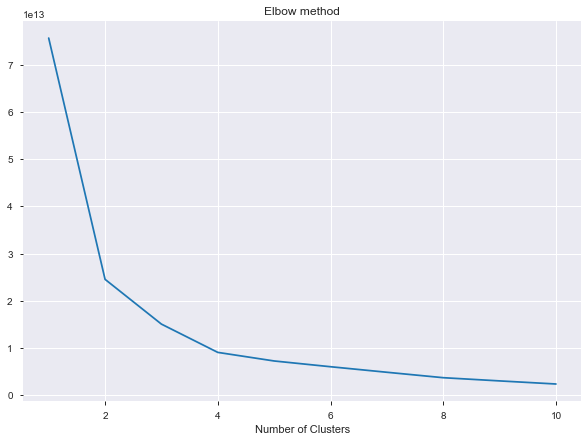

In [103]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init = 'k-means++', n_init=10, max_iter=300, random_state=101).fit(X)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.show()

этот метод показывает оптимальным тоже 3 кластера

In [104]:
kmean = KMeans(n_clusters=3,init = 'k-means++', n_init=10, max_iter=300, random_state=101)
y_kmean = kmean.fit_predict(X)


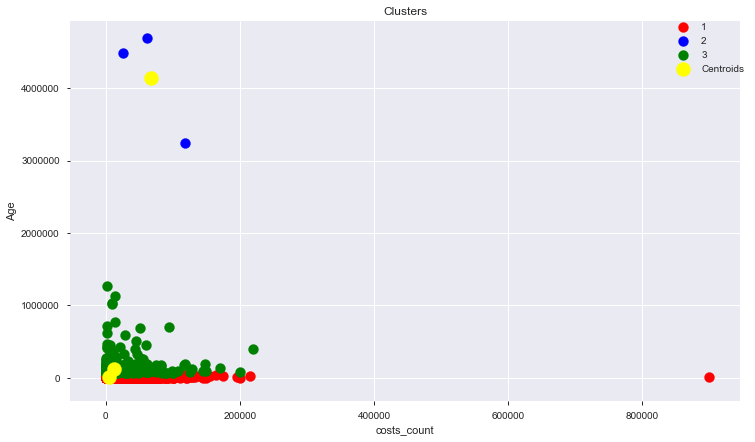

In [108]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_kmean==0, 0], X[y_kmean==0, 1], s=100, c = 'red', label ='1')
plt.scatter(X[y_kmean==1, 0], X[y_kmean==1, 1], s=100, c = 'blue', label ='2')
plt.scatter(X[y_kmean==2, 0], X[y_kmean==2, 1], s=100, c = 'green', label ='3')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=200, c = 'yellow', label ='Centroids')
plt.title('Clusters')
plt.xlabel('costs_count')
plt.ylabel('Age')
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.show()

Агломерационная кластеризация

In [106]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity ='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

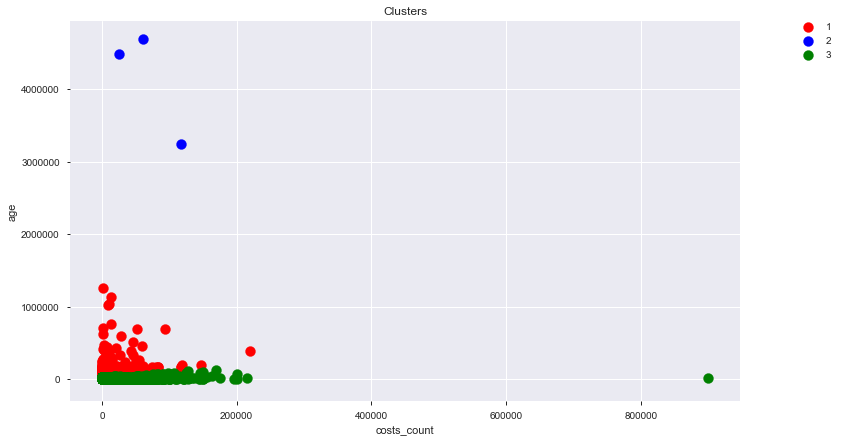

In [109]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c = 'red', label ='1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c = 'blue', label ='2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c = 'green', label ='3')
plt.title('Clusters')
plt.xlabel('costs_count')
plt.ylabel('age')
plt.legend(bbox_to_anchor=(1.15, 1.02))
plt.show()


Подберем оптимальное количество кластеров

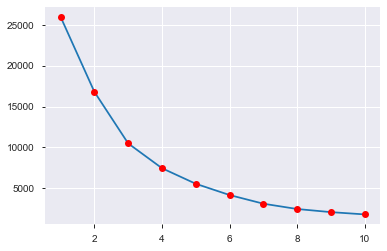

In [110]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

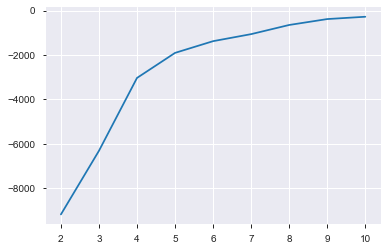

In [111]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

In [112]:
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
print('Оптимально число кластеров:', k_opt)

Оптимально число кластеров: 3


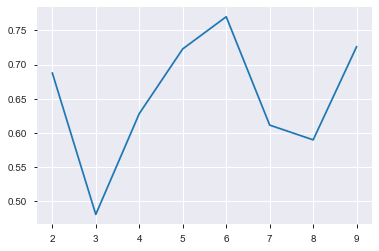

In [113]:
plt.plot(ks[1:-1],diff_r)

Посмотрим с правильным числом кластеров

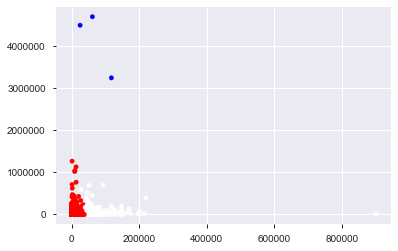

In [114]:
alg = KMeans(n_clusters=3)
clusters = alg.fit_predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

KMeans + Elbow Method

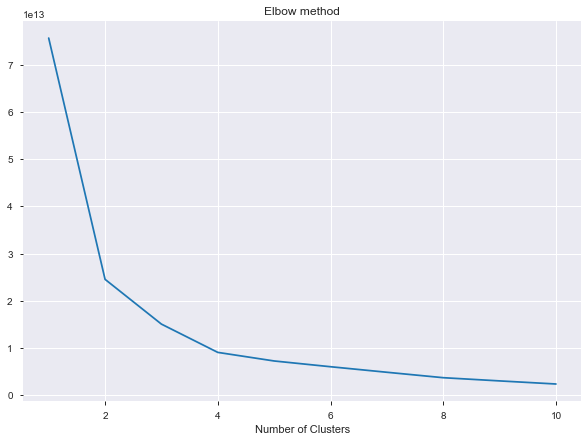

In [115]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init = 'k-means++', n_init=10, max_iter=300, random_state=101).fit(X)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.show()

этот метод показывает оптимальным 4 кластера

In [116]:
kmean = KMeans(n_clusters=4,init = 'k-means++', n_init=10, max_iter=300, random_state=101)
y_kmean = kmean.fit_predict(X)


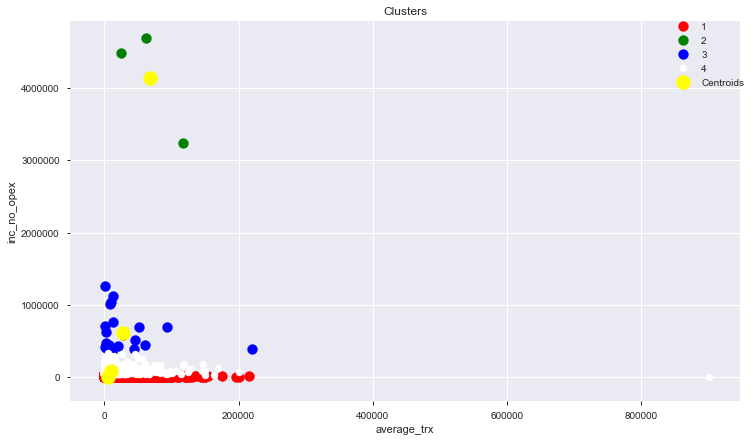

In [117]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_kmean==0, 0], X[y_kmean==0, 1], s=100, c = 'red', label ='1')
plt.scatter(X[y_kmean==1, 0], X[y_kmean==1, 1], s=100, c = 'green', label ='2')
plt.scatter(X[y_kmean==2, 0], X[y_kmean==2, 1], s=100, c = 'blue', label ='3')
plt.scatter(X[y_kmean==3, 0], X[y_kmean==3, 1], s=50, c = 'white', label ='4')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=200, c = 'yellow', label ='Centroids')
plt.title('Clusters')
plt.xlabel('average_trx')
plt.ylabel('inc_no_opex')
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.show() 

Агломерационная кластеризация

In [118]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity ='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

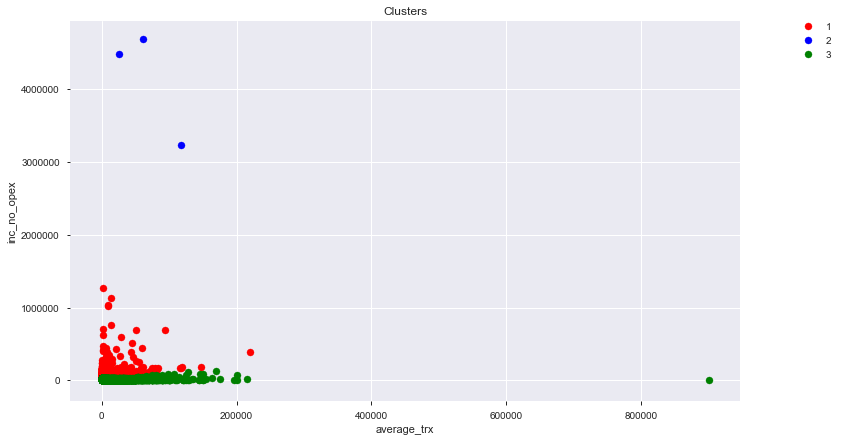

In [119]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=50, c = 'red', label ='1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=50, c = 'blue', label ='2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=50, c = 'green', label ='3')
plt.title('Clusters')
plt.xlabel('average_trx')
plt.ylabel('inc_no_opex')
plt.legend(bbox_to_anchor=(1.15, 1.02))
plt.show()


Кластеризация данных по 'average_trx' и 'inc_no_opex' в разрезе полов, показала, что это хорошие параметры для дальнейшего более детального изучения и построения предсказательных моделей. Мы увидели явное разделение по продуктовому поведению мужчин и женщин, а также выделили 3 кластера, показывающие взаимосвязи между средней транзакцией и доходом без OPEX